In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
print(os.listdir())
import warnings
warnings.filterwarnings('ignore')

['.git', 'column_2C_weka.csv', 'et_ml.ipynb']


In [55]:
name= "column_2C_weka.csv"
df = pd.read_csv(name,sep=";")

paraConvertir = ['incidencia_pelvica', 'inclinacion_pelvica', ' angulo_lordosis_lumbar', 'pendiente_sacra', 'radio_pelvico', 'grado_espondilolistesis']

def ConvertirAFloat(df, columna):
    df[columna] = df[columna].str.replace(',', '.').astype(float)
    return df

for columna in paraConvertir:
    df = ConvertirAFloat(df, columna)

df.head(10)

,incidencia_pelvica,inclinacion_pelvica,angulo_lordosis_lumbar,pendiente_sacra,radio_pelvico,grado_espondilolistesis,clase
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Anormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Anormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Anormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Anormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Anormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Anormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Anormal
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Anormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Anormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Anormal


In [44]:
df.describe() # CREO QUE ESTO DE ACA ES A LO QUE SE REFIERE A LOS VALORES DESCRIPTIVOS ESTADISTICOS xd

,incidencia_pelvica,inclinacion_pelvica,angulo_lordosis_lumbar,pendiente_sacra,radio_pelvico,grado_espondilolistesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   incidencia_pelvica       310 non-null    float64
 1   inclinacion_pelvica      310 non-null    float64
 2    angulo_lordosis_lumbar  310 non-null    float64
 3   pendiente_sacra          310 non-null    float64
 4   radio_pelvico            310 non-null    float64
 5   grado_espondilolistesis  310 non-null    float64
 6   clase                    310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


NO EXISTEN DATOS NULOS DENTRO DEL DATA FRAME


In [46]:
df.isnull().sum()

incidencia_pelvica         0
inclinacion_pelvica        0
 angulo_lordosis_lumbar    0
pendiente_sacra            0
radio_pelvico              0
grado_espondilolistesis    0
clase                      0
dtype: int64

In [59]:
df_clase = df[df['clase'].isin(['Anormal', 'Normal'])]
df_clase['clase'].value_counts()

clase
Anormal    210
Normal     100
Name: count, dtype: int64

Solo existen valores normales y anormales, 210 anormales y 100 normales

# Heatmap

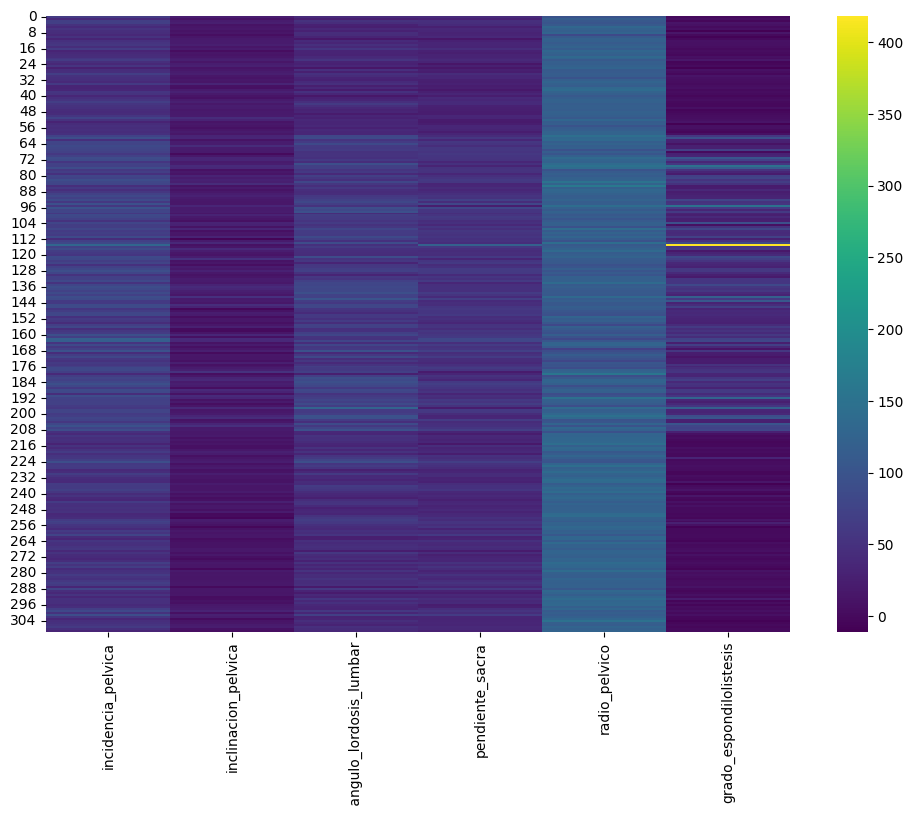

In [70]:
# Heatmap del estado de las columnas usando todas las filas menos la de clase

plt.figure(figsize=(12, 8))
sns.heatmap(df_clase.drop('clase', axis=1), cmap='viridis')
plt.show()


# Histograma

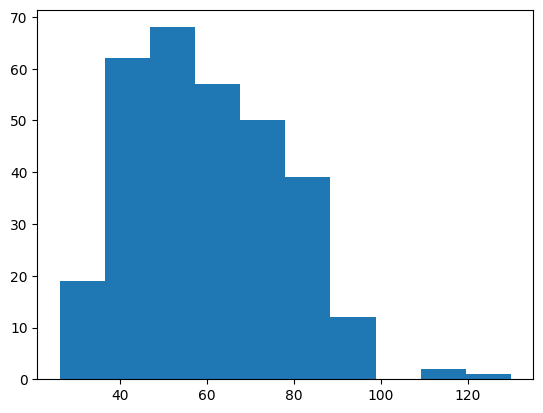

In [50]:
plt.hist(df['incidencia_pelvica'])
plt.show()